# Getting Started

This notebook is intended to be a brief introduction into some of the most important classes and methods in `kl-tools`. We need to write more thorough documentation later!

If you have not installed the software yet, please see the repo's `README`

In [1]:
import numpy as np
import astropy.units as u
from copy import copy
import matplotlib.pyplot as plt

In [11]:
import kl_tools.velocity as velocity

# first, the default velocity model (perfectly centered)
centered_model_pars = {
    'g1': 0.1,
    'g2': -0.05,
    'theta_int': np.pi/6, # radians; will be an OrientedAngle soon
    'sini': 0.8,
    'v0': 0.0,
    'vcirc': 200,
    'rscale': 5,
    'r_unit': u.Unit('pixel'),
    'v_unit': u.km / u.s,
}

centered_model = velocity.VelocityModel(centered_model_pars)

# now an off-centered velocity model
offset_model_pars = copy(centered_model_pars)
offset_model_pars['x0'] = 10
offset_model_pars['y0'] = -5

offset_model = velocity.OffsetVelocityModel(offset_model_pars)

# you can also make a velocity model object dynamically from a builder method:
built_model = velocity.build_model('offset', offset_model_pars)


Now let's connect the models to a coordinate grid:

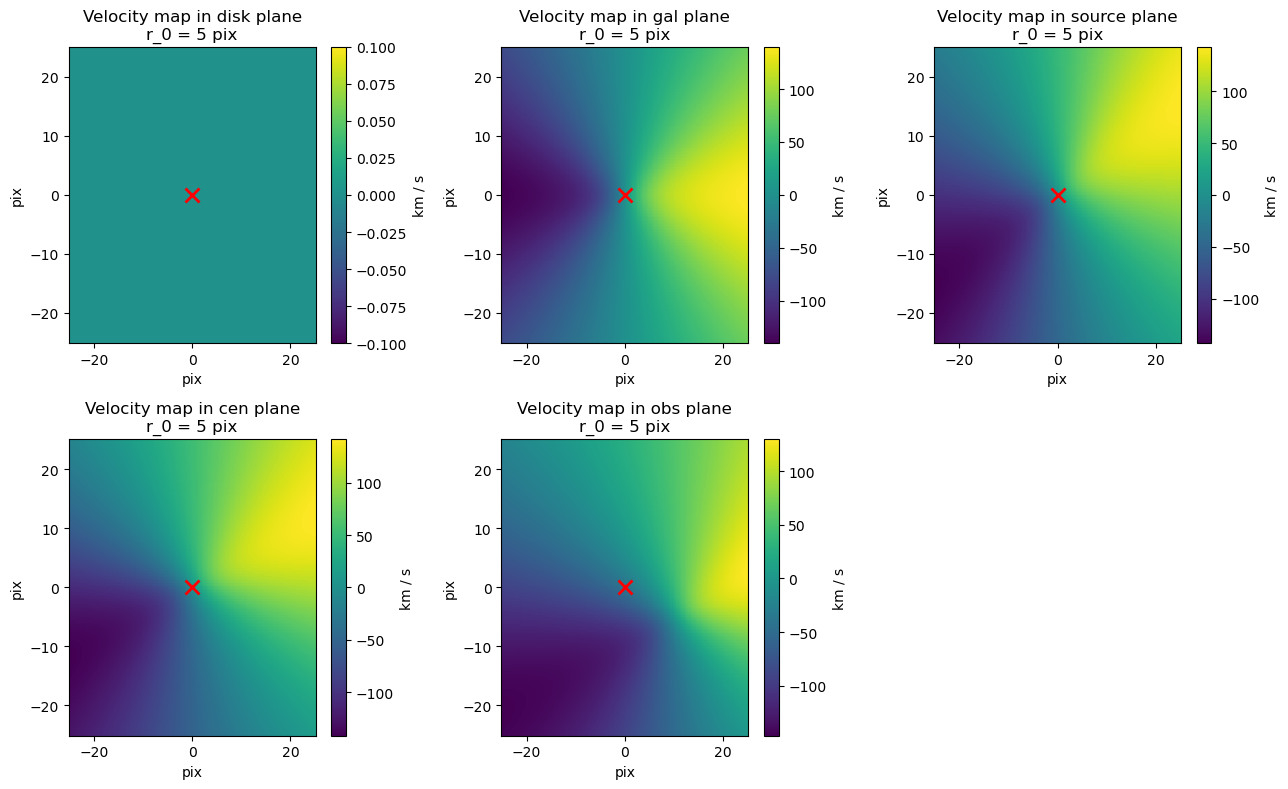

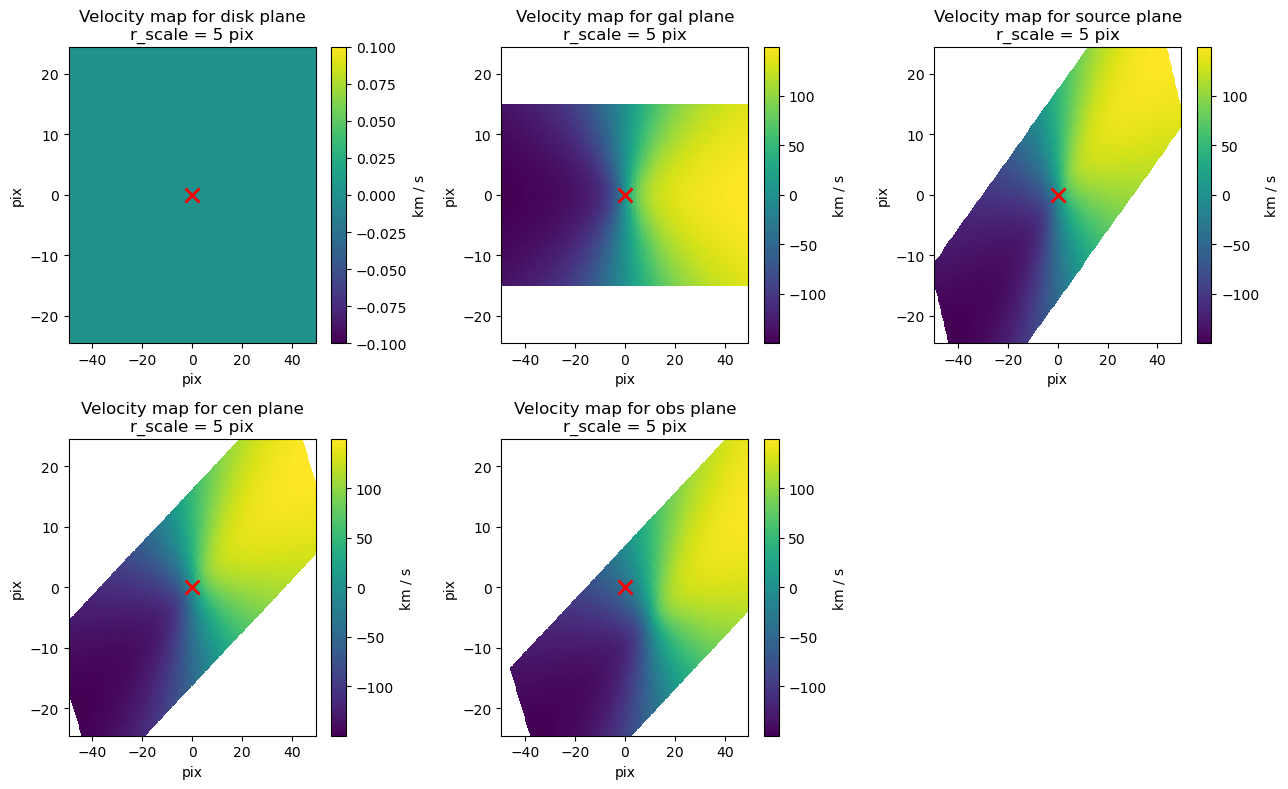

In [13]:
from kl_tools.utils import build_map_grid

# there are two ways to build image grids, depending on whether you want to think about dimensions as X-Y images or row-column numpy arrays
Nx, Ny = 100, 50 # dimensions of the X-Y grid
Nrow, Ncol = Ny, Nx # dimensions of the row-column grid
X, Y = build_map_grid(Nx, Ny, indexing='ij')

vmap = velocity.VelocityMap('offset', offset_model_pars)
obs_image = vmap('obs', X, Y)

# plt.imshow(obs_image, origin='lower')

vmap.plot_all_planes()
vmap.plot_map_transforms(X=X, Y=Y)
